# Titanic survival analysis and prediction
This project is related to the kaggle compition found [here](https://www.kaggle.com/c/titanic)

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline 

## Read data

Data Dictionary:  
  
| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex	   | Sex	                                    |                                                |
| Age	   | Age in years	                            |                                                |
| sibsp	   | # of siblings / spouses aboard the Titanic |	                                             |
| parch	   | # of parents / children aboard the Titanic	|                                                |
| ticket   | Ticket number	                            |                                                |
| fare	   | Passenger fare	                            |                                                |
| cabin	   | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [64]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Find columns with many null values

In [65]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

## Feature engineering 

In [66]:
# Create list of data sets so that the same transformations can be applied to both 
full_data = [train, test]

In [67]:
# Fill Nulls
for d in full_data:
    # Remove all NULLS in the Embarked column
    d["Embarked"] = d["Embarked"].fillna("S")
    # Remove nulls in the age column
    age_avg = d["Age"].mean()
    age_std = d["Age"].std()
    age_null_count = d["Age"].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    d["Age"][np.isnan(d["Age"])] = age_null_random_list
    d["Age"] = d["Age"].astype(int)

/home/treilly/Documents/projects/machine-learning-scratch/sklearn-titanic/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [68]:
# Map values
for d in full_data:
    # Map Sex
    d["Sex"] = d["Sex"].map( {"female": 0, "male": 1} ).astype(int)
    # Mapping Embarked
    d["Embarked"] = d["Embarked"].map( {"S": 0, "C": 1, "Q": 2} ).astype(int)

In [69]:
drop_elements = ["PassengerId", "Name", "Ticket", "Cabin"]
for d in full_data:
    d.drop(drop_elements, axis = 1, inplace=True)

In [70]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,0
1,1,1,0,38,1,0,71.2833,1
2,1,3,0,26,0,0,7.9250,0
3,1,1,0,35,1,0,53.1000,0
4,0,3,1,35,0,0,8.0500,0


## Explore the data

### Explore how features interact with eachother

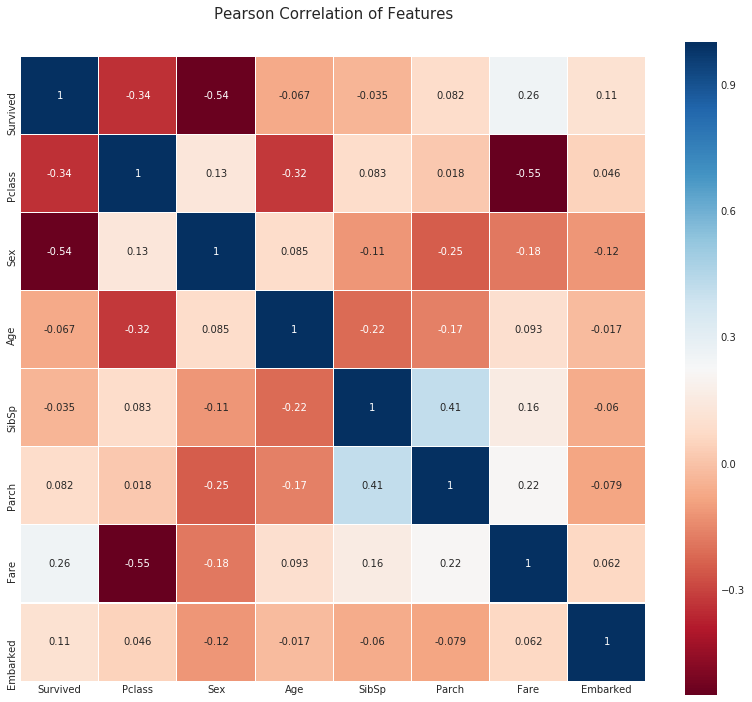

In [71]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

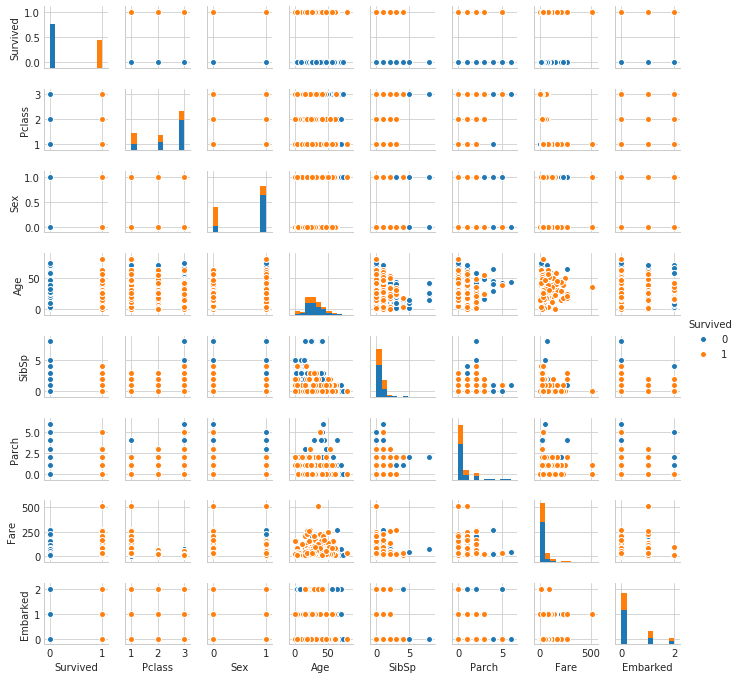

In [80]:
sns.pairplot(train, hue="Survived", size=1.2)

### Pclass
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

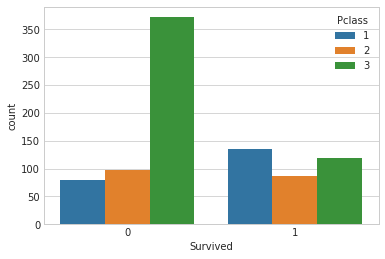

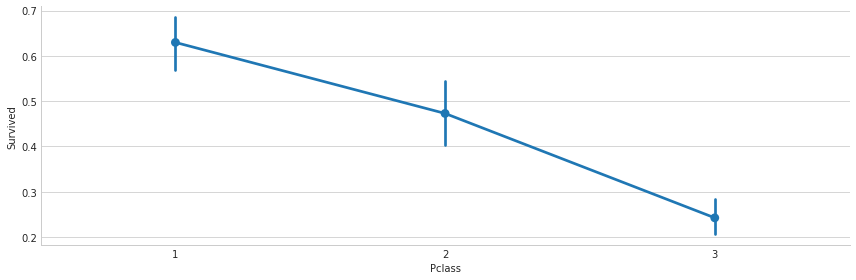

In [42]:
sns.countplot(x="Survived", hue="Pclass", data=train)
sns.factorplot("Pclass","Survived", data=train, size=4, aspect=3)

### Sex
0 = Female  
1 = Male

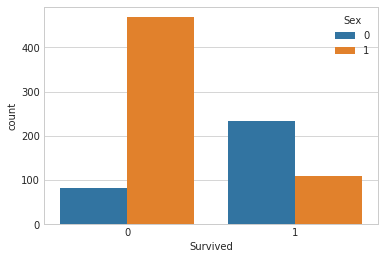

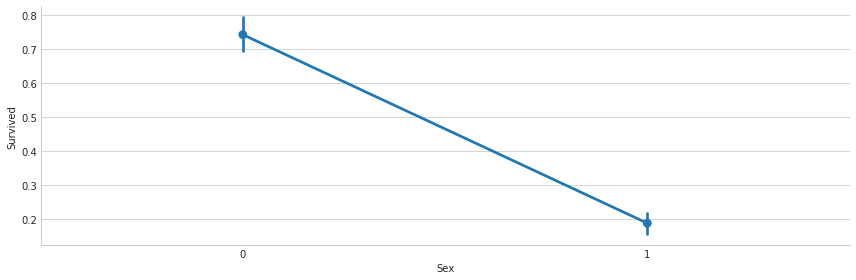

In [44]:
sns.countplot(x="Survived", hue="Sex", data=train)
sns.factorplot("Sex","Survived", data=train, size=4, aspect=3)

### Age
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

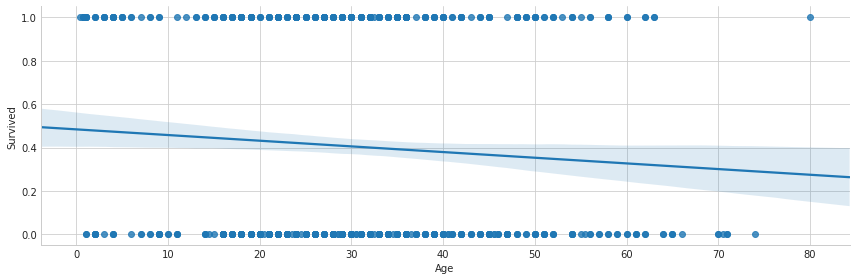

In [45]:
sns.lmplot("Age","Survived", data=train, size=4, aspect=3)

### SibSp
sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

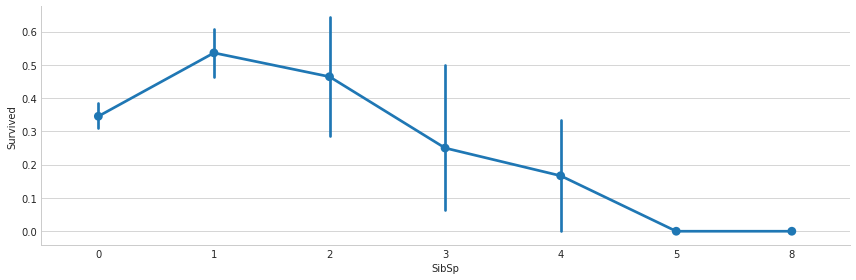

In [46]:
sns.factorplot("SibSp","Survived", data=train, size=4, aspect=3)

### Parch
parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

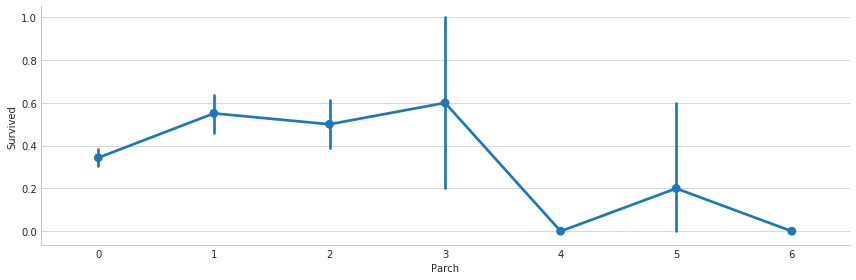

In [47]:
sns.factorplot("Parch","Survived", data=train, size=4, aspect=3)

### Fare

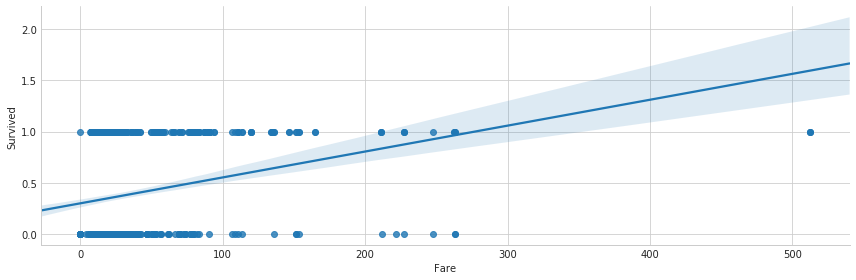

In [48]:
sns.lmplot("Fare","Survived", data=train, size=4, aspect=3)

### Embarked
0 = Southampton  
1 = Cherbourg  
2 = Queenstown

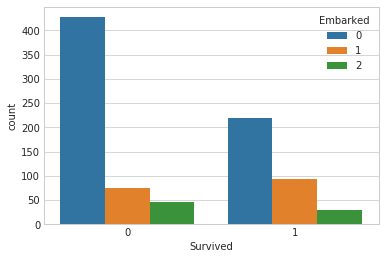

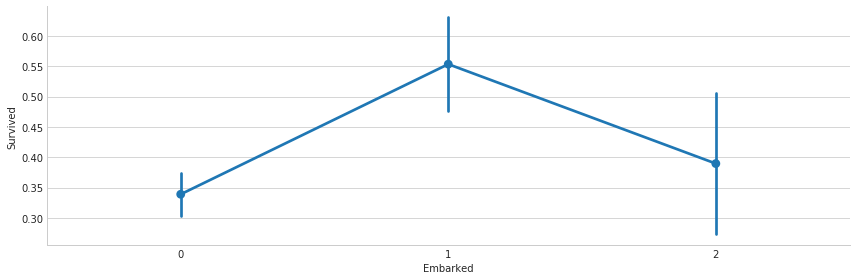

In [50]:
sns.countplot(x="Survived", hue="Embarked", data=train)
sns.factorplot("Embarked","Survived", data=train, size=4, aspect=3)